# Identifying patterns and Trends in campus placements data using machine learning

Importing the libraries

The application of machine learning has grown in popularity in today's fast-paced society as technology has permeated every aspect of our lives. Placement prediction is one of the numerous uses of machine learning. Using machine learning algorithms, placement prediction determines the likelihood that a student will be hired by a firm based on a variety of criteria, including academic achievement, skill set, and prior job experience.


Age: The age of the Candidate.

Gender: The gender of the candidate,either male or female.

Stream : The Stream of the candidate i.e; The candidate belongs to which stream like Electronics And Communication,Computer Science,Information Technology,Mechanical,Civil

Internships:The no.of internships done by the candidate.

CGPA : CGPA of the Candidate till 6th semester.

Hostel : Whether Candidate Lives In College Accommodation or not

HistoryOfBacklogs : Whether Student Ever Had Any Backlogs In Any Subjects.

PlacedOrNot : Whether the candidate is Placed or Not.(1--> placed,0-->Not placed) (target variable)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
df=pd.read_csv('/content/collegePlace.csv')

In [ ]:
# Print the top 10 rows
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
# shape of the data set
df.shape

(2966, 8)

In [ ]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
# Check for missing values in the entire DataFrame
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

    There is no null values in our dataset

In [ ]:
# check for duplicate values in the entire DataFrame
df.duplicated().sum()

1829

    we have 1829 duplicate values present in the dataset

In [ ]:
# Drop duplicate rows and keep the first occurrence
df.drop_duplicates(inplace=True)

      droping the duplicate values

In [ ]:
# value count for Gender column,Internship column,Stream column,PlacedOrNot column
c=['Gender','Internships','Stream','PlacedOrNot']
for i in c:
  print(f"The value counts for {i}  ")
  print(df[i].value_counts().to_string(),'\n')

The value counts for Gender  
Male      846
Female    291 

The value counts for Internships  
1    461
0    445
2    186
3     45 

The value counts for Stream  
Computer Science                 243
Information Technology           243
Electronics And Communication    174
Mechanical                       165
Electrical                       160
Civil                            152 

The value counts for PlacedOrNot  
1    659
0    478 



      From the above we can understand our dataset is balanced

# EDA{Exploratory Data Analysis}

## Univariate Analysis

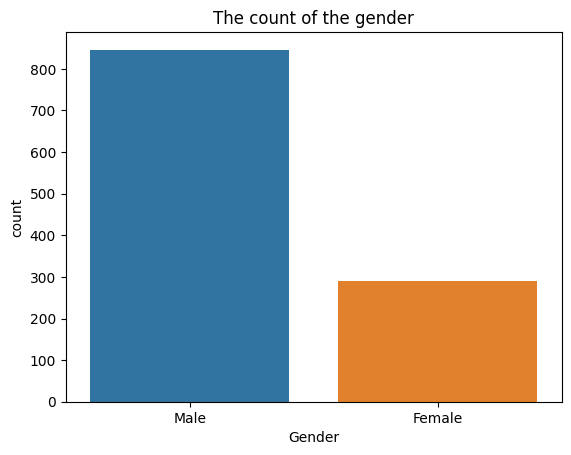

In [ ]:
# Perform Univariate Analysis for Gender
sns.countplot(x=df['Gender'],data=df)
plt.title("The count of the gender")
plt.show()


      The male students are high when compared to the female students

<Axes: ylabel='Gender'>

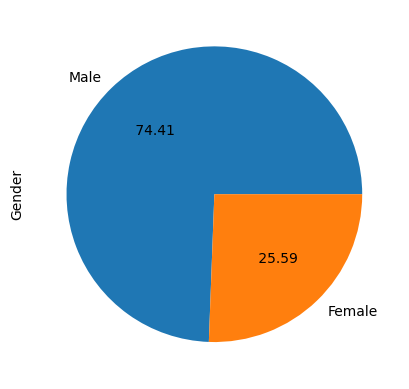

In [ ]:
df['Gender'].value_counts().plot(kind='pie',autopct='% .2f')

<Axes: xlabel='Stream', ylabel='count'>

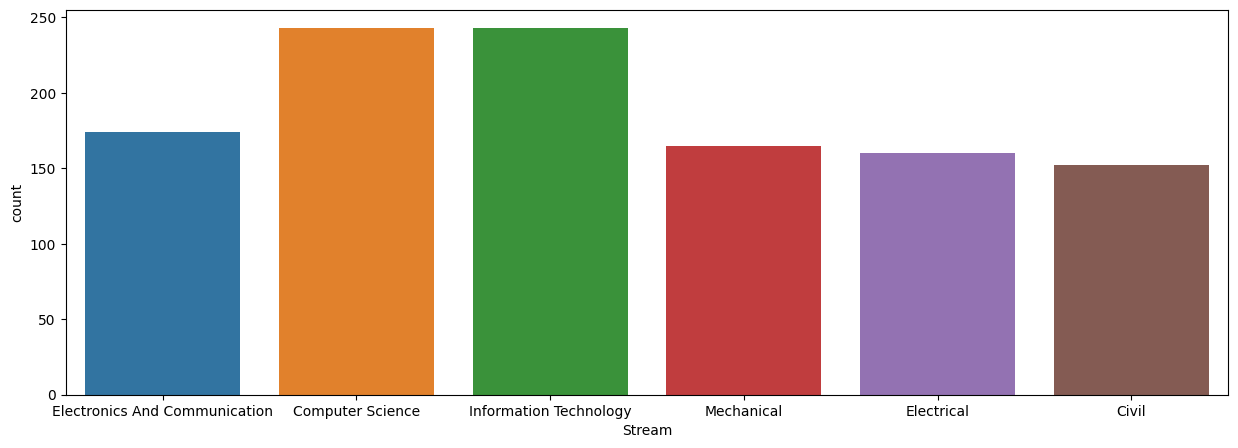

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Stream'],data=df)
#df['Stream'].value_counts().plot(kind='pie',autopct='% .2f')


          Most of the students are present in the Computer Science and Information Technology and very less students are present in the civil,Electrical.

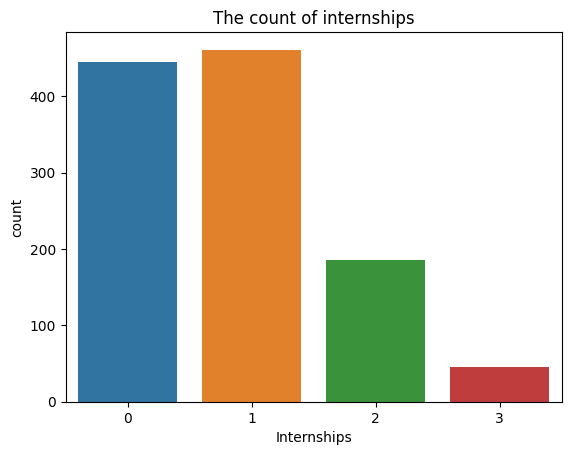

In [ ]:
# Perform Univariate Analysis for Internships
sns.countplot(x=df['Internships'],data=df)
plt.title('The count of internships')
plt.show()

    Most of the students are done 0 and 1 internship

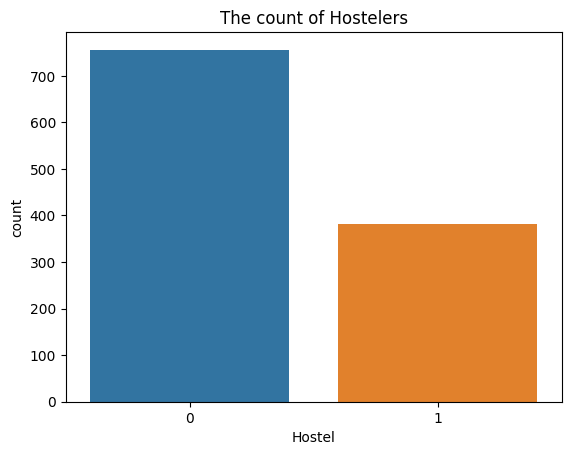

In [ ]:
# Performing Univariant analysis for Hostel
sns.countplot(x=df['Hostel'],data=df)
plt.title('The count of Hostelers')
plt.show()

      Most of the students are from their home when compared to Hostelers.

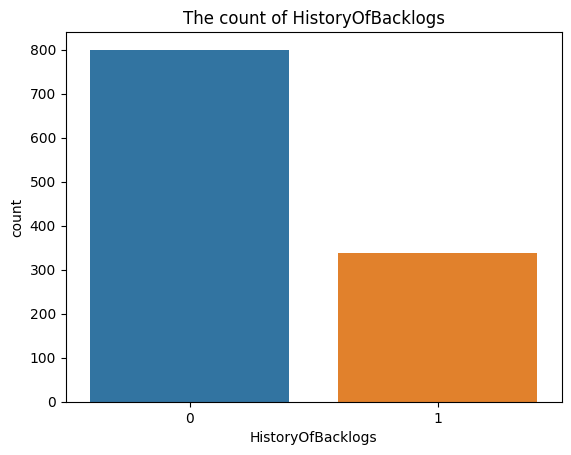

In [ ]:

# performing Univariant analysis for HistoryOfBacklogs
sns.countplot(x=df['HistoryOfBacklogs'],data=df)
plt.title('The count of HistoryOfBacklogs')
plt.show()

      Most of the students does not contains any Backlogs.

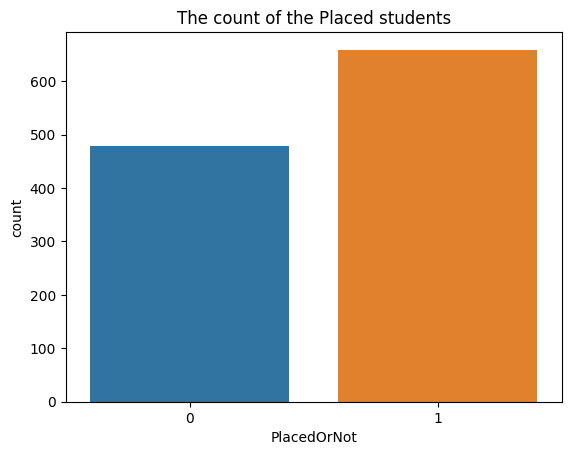

In [ ]:
# Performing Univariant analysis for PlacedOrNot
sns.countplot(x=df['PlacedOrNot'],data=df)
plt.title('The count of the Placed students')
plt.show()

      Most of the students are placed.

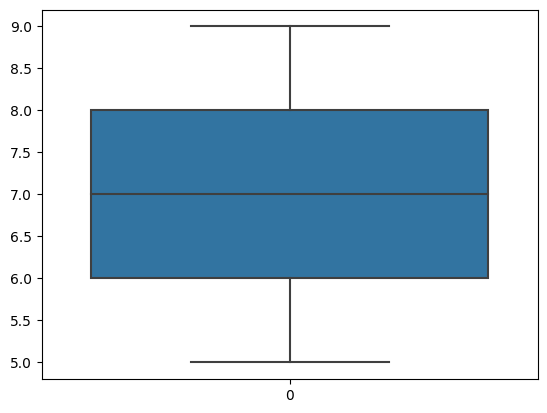

In [ ]:

sns.boxplot(df['CGPA'])
plt.show()

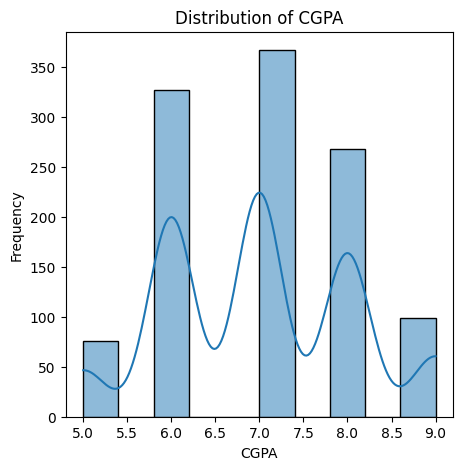

In [ ]:

# Perform Univariate Analysis for CGPA
plt.figure(figsize=(5, 5))
sns.histplot(df['CGPA'], bins=10, kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

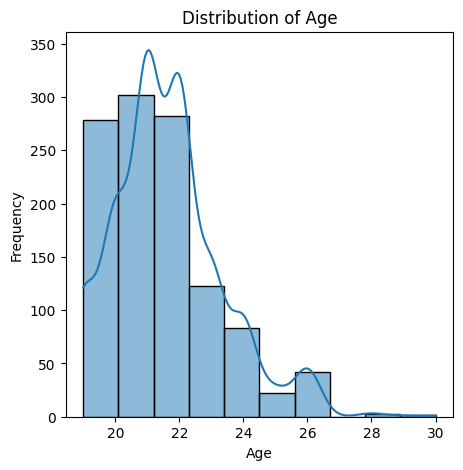

In [ ]:

# Perform Univariate Analysis for Age
plt.figure(figsize=(5, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Bivariant Analysis

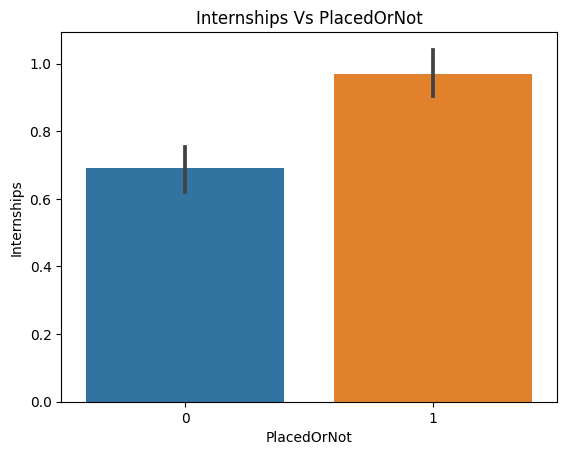

In [ ]:
#Bivariant Analysis : Internships vs PlacedORNot
sns.barplot(x=df['PlacedOrNot'],y=df['Internships'],data=df)
plt.title('Internships Vs PlacedOrNot')
plt.show()

          Magority of students who done internship will be placed.

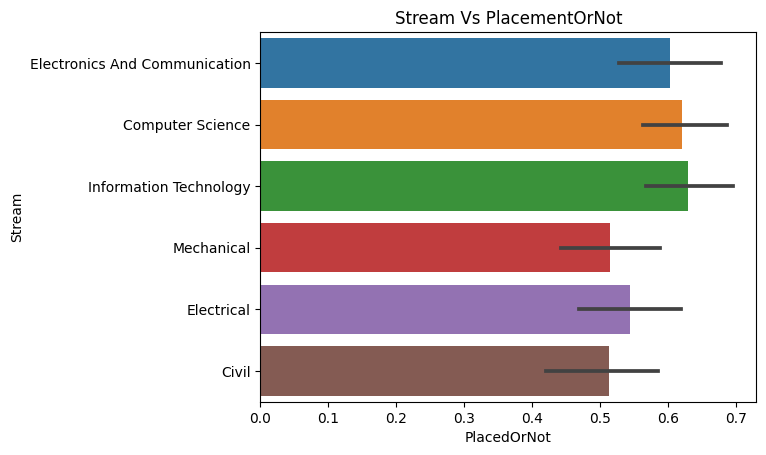

In [ ]:
# Performing Bivariant Analysis : Stream vs PlacedOrNot
sns.barplot(x=df['PlacedOrNot'],y=df['Stream'],data=df)
plt.title('Stream Vs PlacementOrNot')
plt.show()

        Almost all the stream students are placed in the placements.

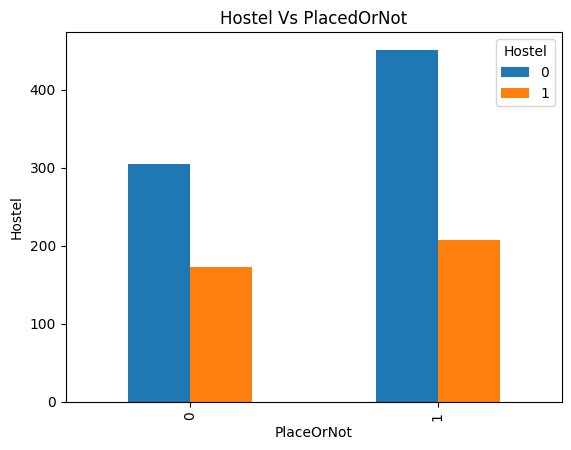

In [ ]:
# Performing Bivariant Analysis : Hostel Vs PlacedOrNot
pd.crosstab(df['PlacedOrNot'],df['Hostel']).plot(kind='bar')
plt.title('Hostel Vs PlacedOrNot')
plt.xlabel('PlaceOrNot')
plt.ylabel('Hostel')
plt.show()

      Students how are not staying in hostels are highly placed than Hostelers.

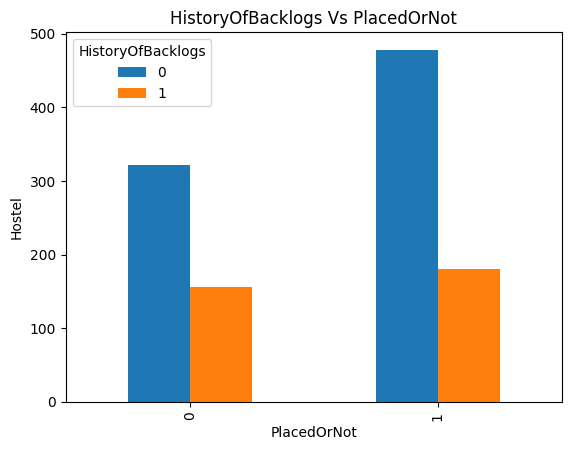

In [ ]:
# History of Backlogs VS PlacedOrNot
pd.crosstab(df['PlacedOrNot'],df['HistoryOfBacklogs']).plot(kind='bar')
plt.title('HistoryOfBacklogs Vs PlacedOrNot')
plt.xlabel('PlacedOrNot')
plt.ylabel('Hostel')
plt.show()


    The Student does not contain any backlogs are placed highly...  

<Axes: xlabel='Age', ylabel='Density'>

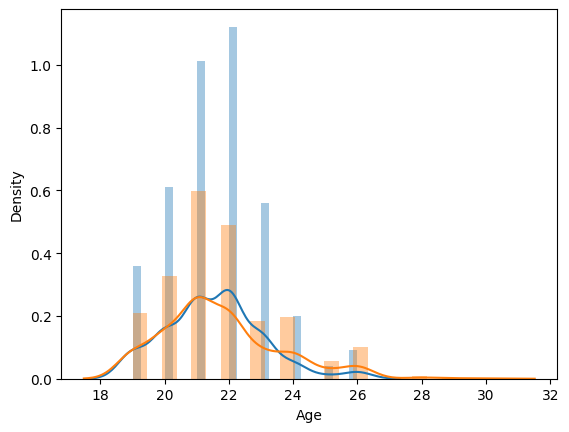

In [ ]:
sns.distplot(df[df['PlacedOrNot']==0]['Age'])
sns.distplot(df[df['PlacedOrNot']==1]['Age'])


    The age of 21 and 22 students are mostly placed.

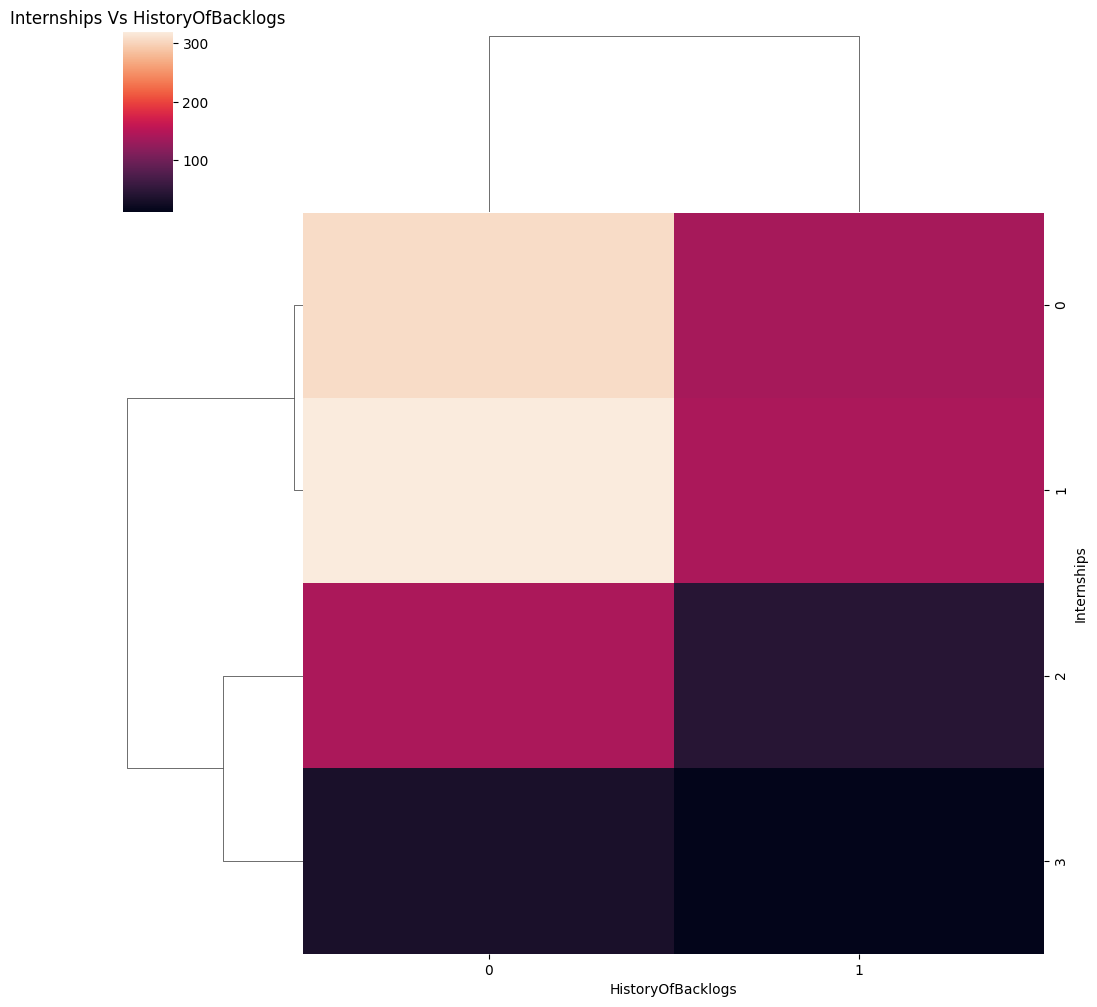

In [ ]:
# clustermap between Internships and History of Backlogs
sns.clustermap(pd.crosstab(df['Internships'],df['HistoryOfBacklogs']))
plt.title('Internships Vs HistoryOfBacklogs')
plt.show()

# Multivariate analysis

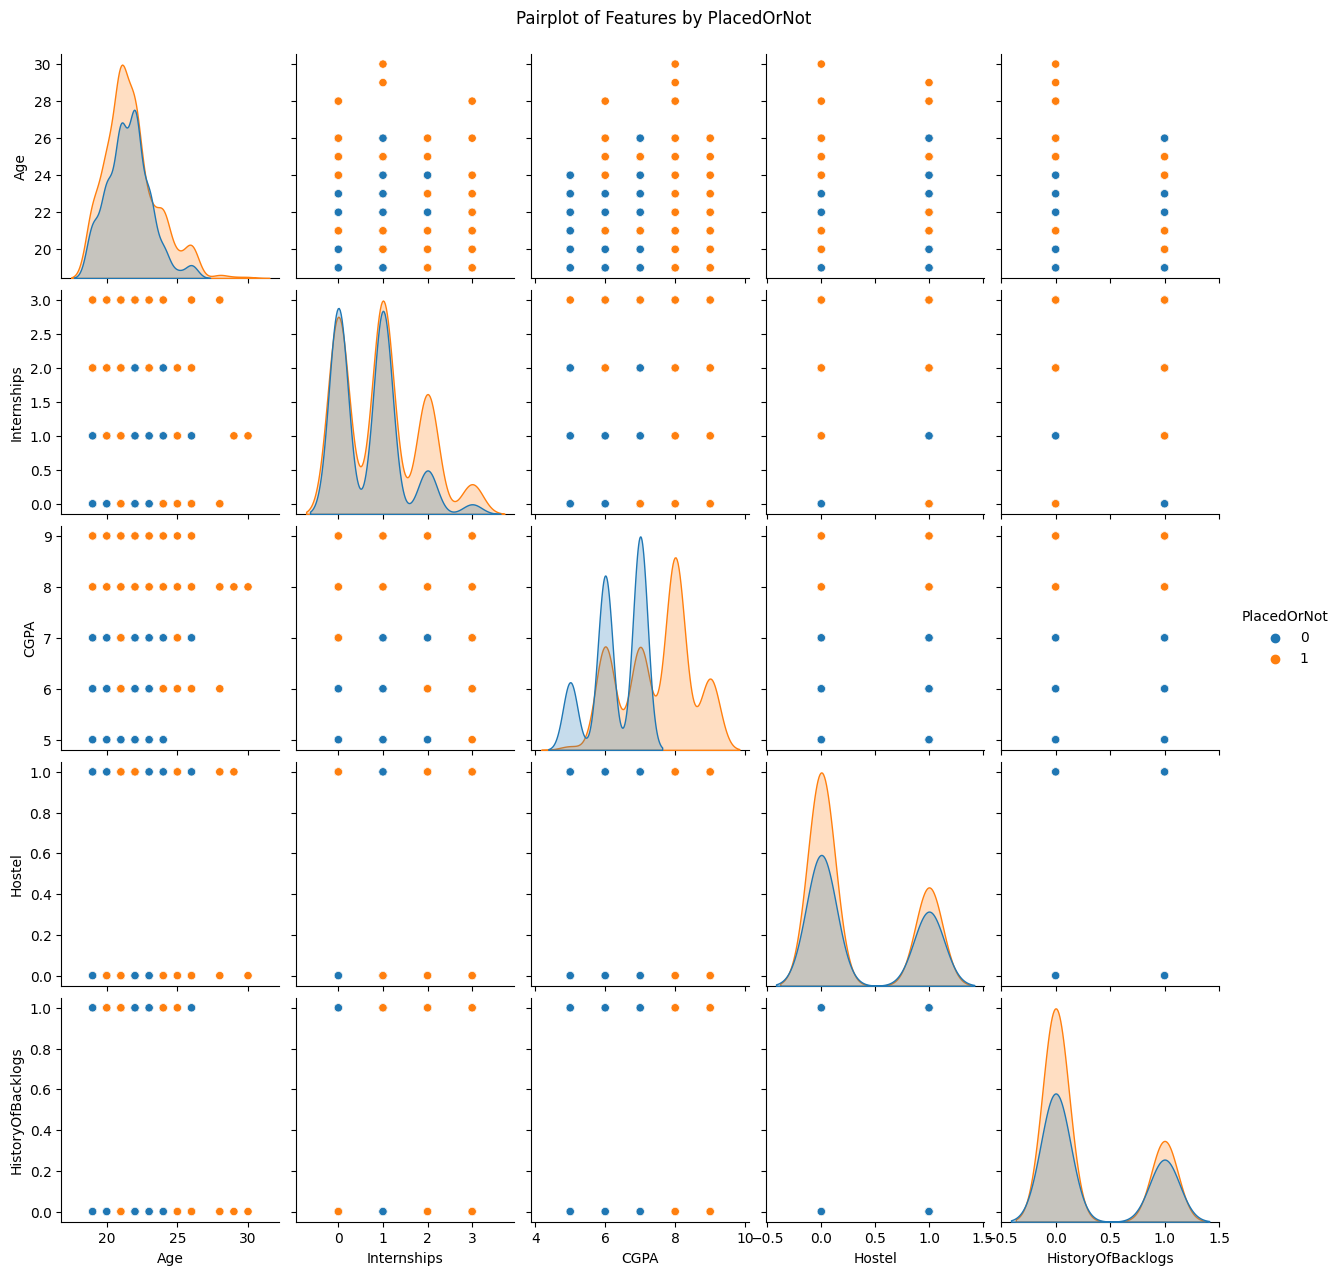

In [ ]:
# Multivariate Analysis: Pairplot
sns.pairplot(df, hue='PlacedOrNot')
plt.suptitle('Pairplot of Features by PlacedOrNot', y=1.02)
plt.show()

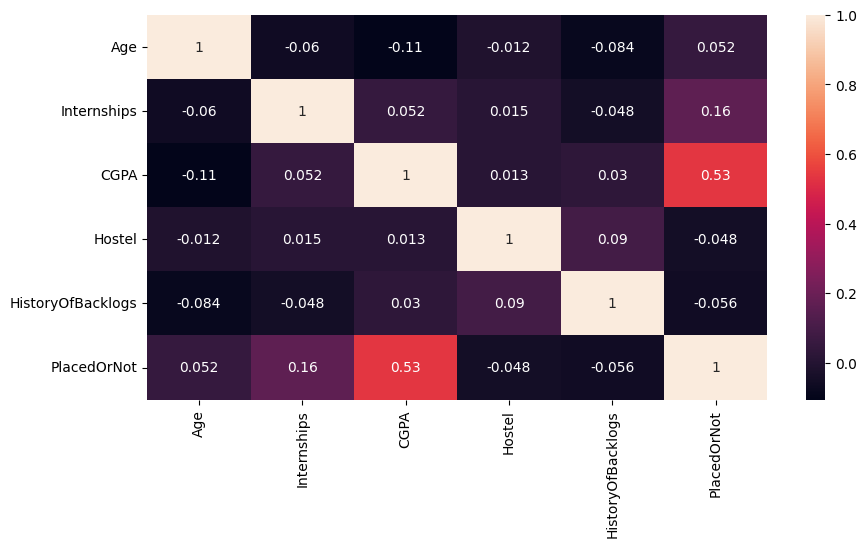

In [ ]:
# Multivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Descriptive Analysis

In [ ]:
df.describe() # Generate descriptive statistics

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,21.641161,0.851363,6.988566,0.335092,0.296394,0.579595
std,1.715606,0.831743,1.067630,0.472230,0.456868,0.493841
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,1.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


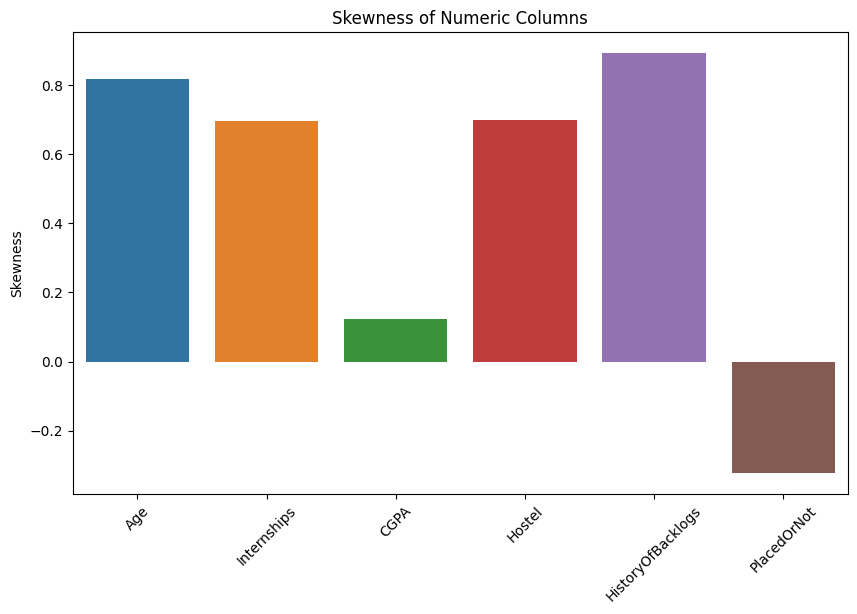

In [ ]:
# Calculate skewness for numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
skewness = numeric_columns.apply(lambda x: x.skew())
# Visualize skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness)
plt.title('Skewness of Numeric Columns')
plt.xticks(rotation=45)
plt.ylabel('Skewness')
plt.show()


In [ ]:
df.skew()

Age                  0.817990
Internships          0.697572
CGPA                 0.122766
Hostel               0.699651
HistoryOfBacklogs    0.892883
PlacedOrNot         -0.322920
dtype: float64

      Age has moderate skew .
      Interships has moderate skew.
      CGPA has Symmetrical Distributed.
      Hostel has Moderate skew .
      HistoryOfBacklogs has high skew.
      PlacedOrNot has less skew .
      


In [ ]:
df.columns # Column names in the dataset

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [ ]:
#handling missing values
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

      we have no missing values.So no need to handle.

# Handling Outliers

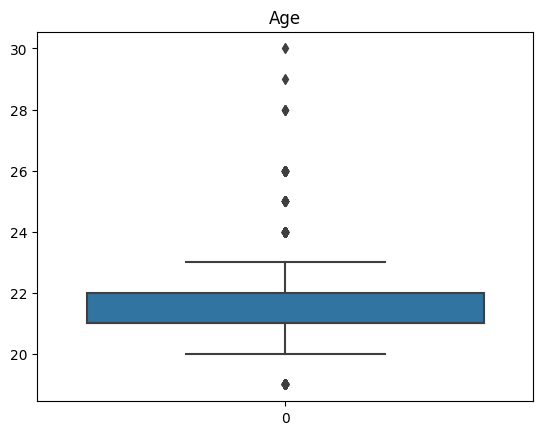

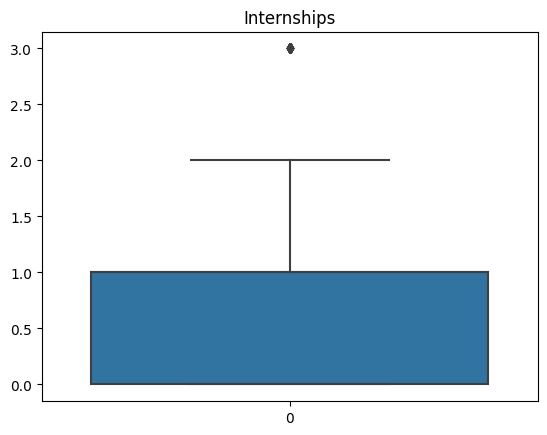

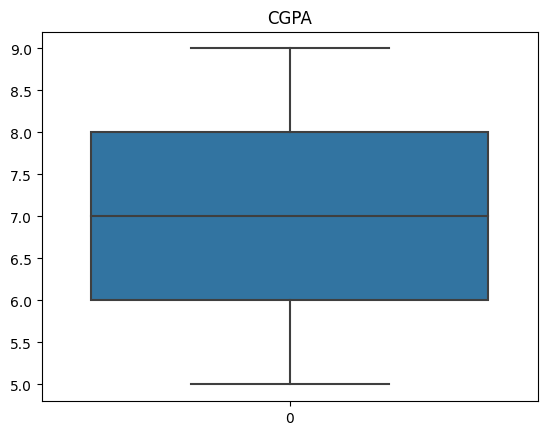

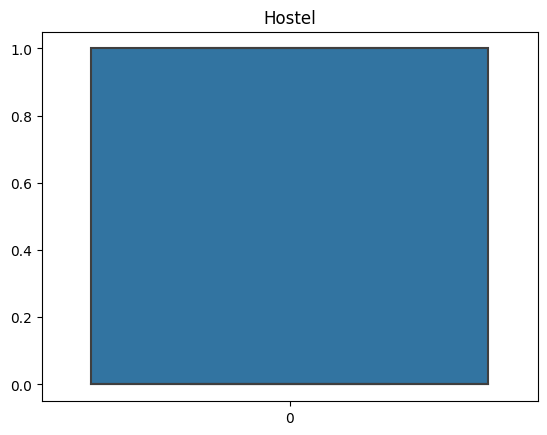

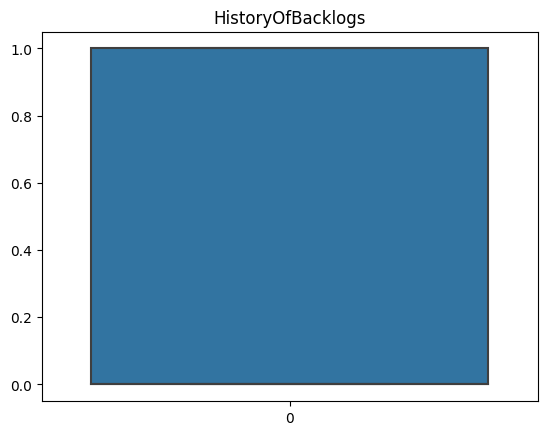

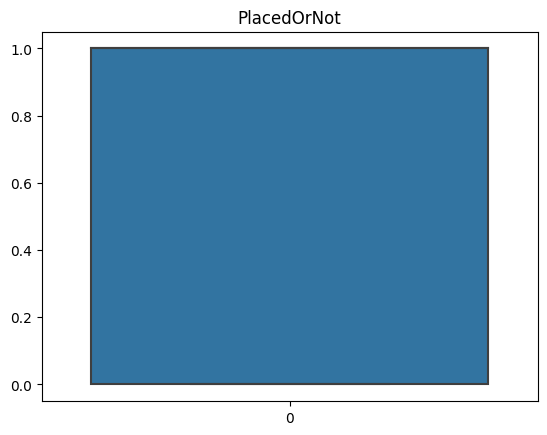

In [ ]:

for i in df.columns:
  if type(df[i][0])!=str:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
#handling the outliers
columns_with_outliers = ['Age', 'Internships']

# Function to handle outliers using IQR method
def handle_outliers_iqr(data, columns):
    for col in columns:
        if np.issubdtype(data[col].dtype, np.number):  # Check if the column contains numeric values
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
            data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Apply the outlier handling function
data_cleaned = handle_outliers_iqr(df.copy(), columns_with_outliers)

# Display the data before and after handling outliers
print("Original Data:")
print(df)
print("\nData after handling outliers:")
print(data_cleaned)

Original Data:
      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2946   23    Male         Information Technology            1     7       1   
2952   23    Male                     Mechanical            0     8       1   
2954   23  Female               Computer Science            1     8       0   
2958   23    Male               Computer Science            0     6       0   
2960   23    Male                     Mechanical            1     7       1   

      HistoryOfBacklogs  PlacedOrNot

# Feature Engineering

## Handling Categorical data(Encoding)


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()

In [ ]:
df['Gender']=lb.fit_transform(df['Gender'])
df['Stream']=lb.fit_transform(df['Stream'])

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


# Scaling Techniques

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
# Initialize StandardScaler and MinMaxScaler
mms=MinMaxScaler()
std=StandardScaler()

In [ ]:
# Scale numerical features and  Replace original columns with scaled values

df['Age']=std.fit_transform(df[['Age']])
df['Gender']=mms.fit_transform(df[['Gender']])
df['Stream']=mms.fit_transform(df[['Stream']])
df['Internships']=std.fit_transform(df[['Internships']])
df['CGPA']=std.fit_transform(df[['CGPA']])
df['Hostel']=mms.fit_transform(df[['Hostel']])
df['HistoryOfBacklogs']=mms.fit_transform(df[['HistoryOfBacklogs']])

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0.209254,1.0,0.6,0.178784,0.947780,1.0,1.0,1
1,-0.373887,0.0,0.2,-1.024040,0.010714,1.0,1.0,1
2,0.209254,0.0,0.8,0.178784,-0.926352,0.0,0.0,1
3,-0.373887,1.0,0.8,-1.024040,0.947780,0.0,1.0,1
4,0.209254,1.0,1.0,-1.024040,0.947780,1.0,0.0,1


# Spliting the data

In [ ]:
# Split features and target variable
x=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
# sizes fo x_train,y_train,x_test,y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(909, 7)
(909,)
(228, 7)
(228,)


Balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
x_test,y_test=smote.fit_resample(x_test,y_test)

# Now, X_train_resampled and y_train_resampled contain the balanced data

In [ ]:
# Calculate class distribution in train and test sets
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()

# Display class distribution in train and test sets
print("Class distribution in train set:")
print(train_class_distribution)

print("\nClass distribution in test set:")
print(test_class_distribution)

Class distribution in train set:
1    523
0    523
Name: PlacedOrNot, dtype: int64

Class distribution in test set:
0    136
1    136
Name: PlacedOrNot, dtype: int64


# model building

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# print confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

[[108  28]
 [ 37  99]]
Accuracy: 0.7610294117647058
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       136
           1       0.78      0.73      0.75       136

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



 SVC { Support vector machine}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# print confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)




# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

[[109  27]
 [ 40  96]]
Accuracy: 0.7536764705882353
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       136
           1       0.78      0.71      0.74       136

    accuracy                           0.75       272
   macro avg       0.76      0.75      0.75       272
weighted avg       0.76      0.75      0.75       272



 K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# print confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

[[113  23]
 [ 42  94]]
Accuracy: 0.7610294117647058
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       136
           1       0.80      0.69      0.74       136

    accuracy                           0.76       272
   macro avg       0.77      0.76      0.76       272
weighted avg       0.77      0.76      0.76       272



 Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7757352941176471
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       136
           1       0.78      0.76      0.77       136

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272

Confusion Matrix:
 [[107  29]
 [ 32 104]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7610294117647058
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       136
           1       0.77      0.75      0.76       136

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

Confusion Matrix:
 [[105  31]
 [ 34 102]]


XG Boost

In [ ]:
from xgboost import XGBClassifier



In [ ]:

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7941176470588235
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       136
           1       0.82      0.76      0.79       136

    accuracy                           0.79       272
   macro avg       0.80      0.79      0.79       272
weighted avg       0.80      0.79      0.79       272

Confusion Matrix:
 [[113  23]
 [ 33 103]]


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8272058823529411
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       136
           1       0.89      0.74      0.81       136

    accuracy                           0.83       272
   macro avg       0.84      0.83      0.83       272
weighted avg       0.84      0.83      0.83       272

Confusion Matrix:
 [[124  12]
 [ 35 101]]


In [ ]:
# Initialize and train models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('k-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Support Vector Machine', SVC(kernel='linear', random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]
results = []

# Train and evaluate models
for name, model in models:
    if 'scale' in dir(model):
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
# Compare and print results
results.sort(key=lambda x: x[1], reverse=True)
for name, accuracy in results:
    print(f"{name}: Accuracy = {accuracy:.4f}")

Naive Bayes: Accuracy = 0.8272
k-Nearest Neighbors: Accuracy = 0.8015
XGBoost: Accuracy = 0.7941
Decision Tree: Accuracy = 0.7757
Logistic Regression: Accuracy = 0.7610
Random Forest: Accuracy = 0.7610
Support Vector Machine: Accuracy = 0.7537


Identifying The Best module

In [ ]:
# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
navi=nb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = navi.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8272058823529411
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       136
           1       0.89      0.74      0.81       136

    accuracy                           0.83       272
   macro avg       0.84      0.83      0.83       272
weighted avg       0.84      0.83      0.83       272

Confusion Matrix:
 [[124  12]
 [ 35 101]]


Testing

In [ ]:
df.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0.209254,1.0,0.6,0.178784,0.947780,1.0,1.0,1
1,-0.373887,0.0,0.2,-1.024040,0.010714,1.0,1.0,1
2,0.209254,0.0,0.8,0.178784,-0.926352,0.0,0.0,1
3,-0.373887,1.0,0.8,-1.024040,0.947780,0.0,1.0,1
4,0.209254,1.0,1.0,-1.024040,0.947780,1.0,0.0,1
5,0.209254,1.0,0.6,-1.024040,-0.926352,0.0,0.0,0
6,-0.373887,1.0,0.2,-1.024040,0.010714,0.0,1.0,0
7,-0.373887,1.0,0.8,0.178784,0.010714,0.0,0.0,0
8,-0.373887,1.0,0.2,1.381608,-0.926352,0.0,0.0,1
9,-0.373887,0.0,0.2,0.178784,-0.926352,1.0,0.0,0


In [ ]:
navi.predict([[0.209254,	1.0, 	0.6, 	0.178784, 	0.947780, 	1.0	, 1.0	]])

array([1])

In [ ]:
navi.predict([[0.792395,	1.0,	0.8,	0.178784,	0.010714,	1.0,	1.0	]])

array([0])

In [ ]:
navi.predict([[0.209254,	1.0, 0.6,	-1.024040,	-0.926352,	0.0,	0.0	]])

array([0])

Saving the Model

In [ ]:
import pickle

In [ ]:

# Save the model to a file using pickle
pickle.dump(navi,open('profit.pkl','wb'))